In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [151]:
df=pd.read_excel('/Users/egortishchenko/Downloads/SoA - Admission case - Data - vF - 14.02.2023.xlsx')

df

,Main bank,Gender,Age,A serious and stable company,A progressive and modern company,Service quality,Offers all common credit services,Ease and speed of processing credit products,Company’s lifetime on the market,A trustworthy company
0,Competitor name,Respondent,Respondent,Satisfoction,Importance,Importance,Satisfaction,Satisfaction,Importance,Importance
1,Bank Aster,2,38,5,4,5,5,5,3,5
2,Bank Aster,2,37,4,4,5,5,4,4,5
3,Bank Rose,1,35,5,4,5,5,4,5,5
4,Bank Snowdrop,1,47,5,4,4,5,5,4,5
...,...,...,...,...,...,...,...,...,...,...
220,Bank Barberry,2,39,4,4,5,4,4,3,4
221,Bank Snowdrop,2,26,4,3,5,3,4,4,3
222,Bank Rose,1,26,5,4,5,4,5,1,5
223,Bank Snowdrop,2,44,5,4,4,4,4,1,4


<font size='5'> Проверим, есть ли в наших данных "пропуски"</font>

In [152]:
df.isna().sum()

Main bank                                        0
Gender                                           0
Age                                              0
A serious and stable company                     0
A progressive and modern company                 0
Service quality                                  0
Offers all common credit services                0
Ease and speed of processing  credit products    0
Company’s lifetime on the market                 0
A trustworthy company                            0
dtype: int64

<font size='5'> Разобьем  признаки на две группы: в первой группе будут признаки, отоброжающие важность для потребителя, а во второй группе будут признаки, отоброжающие степень удовелетворенности потребителя чем-либо </font>

In [153]:
important=['A progressive and modern company','Service quality','Company’s lifetime on the market','A trustworthy company','Main bank']

satisfication=[i for i in df.columns if i not in important][2:]+['Main bank']

# в каждый список я добавил 'Main bank', чтобы потом показать распределение признаков у разных банков

<font size='5'>Теперь удалим  строку, содержащую описание столбцов,  так как она больше нам не понадобится</font>

In [154]:
df=df.drop([0])

<font size='5'> Далее проведем описательный анализ для всех числовых признаков. Для начала посчитаем для каждого признака стандартный набор статистических показателей</font >

In [155]:
df.iloc[:,1:].astype('int').describe()

,Gender,Age,A serious and stable company,A progressive and modern company,Service quality,Offers all common credit services,Ease and speed of processing credit products,Company’s lifetime on the market,A trustworthy company
count,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000
mean,1.486607,35.388393,4.517857,3.928571,4.531250,4.339286,4.330357,3.991071,4.674107
std,0.500940,12.866895,0.797779,1.047862,0.774542,0.746334,0.668153,1.120502,0.706186
min,1.000000,18.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000
25%,1.000000,24.750000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
50%,1.000000,36.000000,5.000000,4.000000,5.000000,4.500000,4.000000,4.000000,5.000000
75%,2.000000,45.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,2.000000,64.000000,5.000000,9.000000,5.000000,5.000000,5.000000,5.000000,9.000000


<font size='5'> Заметим, что в колонках "A progressive and modern company" и "A trustworthy company" наблюдаются аномальные значения: их максимумы больше 5. Давайте найдем их в датасете </font>

<font size='5'> Перед этим, на всякий случай, сделаем value_counts(), чтобы убедиться, что больше аномальных значений нет  </font>

In [156]:
for i in df.columns:
    print(df[i].value_counts())
    print('---')

Bank Aster       60
Bank Snowdrop    52
Bank Rose        45
Bank Barberry    44
Bank Bramble     23
Name: Main bank, dtype: int64
---
1    115
2    109
Name: Gender, dtype: int64
---
19    20
42    16
26    16
18    15
47    11
33    10
48    10
41     9
20     9
39     8
27     7
52     7
44     7
36     7
22     6
29     6
61     5
64     4
56     4
28     4
51     4
40     4
31     4
49     4
38     4
25     3
23     3
34     3
63     2
21     2
45     2
32     1
55     1
54     1
46     1
37     1
62     1
35     1
24     1
Name: Age, dtype: int64
---
5    146
4     58
3     13
2      4
1      3
Name: A serious and stable company, dtype: int64
---
4    118
5     51
3     39
1     10
2      4
9      2
Name: A progressive and modern company, dtype: int64
---
5    143
4     67
3      9
1      5
Name: Service quality, dtype: int64
---
5    112
4     77
3     34
2      1
Name: Offers all common credit services, dtype: int64
---
4    106
5     97
3     19
2      2
Name: Ease and speed of

<font size='5'> Все хорошо, тогда продолжим поиск "больших значений"  </font>

In [157]:
df[((df['A progressive and modern company']>5) | (df['A trustworthy company']>5))]

,Main bank,Gender,Age,A serious and stable company,A progressive and modern company,Service quality,Offers all common credit services,Ease and speed of processing credit products,Company’s lifetime on the market,A trustworthy company
90,Bank Snowdrop,1,63,5,5,5,5,5,2,9
91,Bank Snowdrop,2,19,5,9,5,5,3,4,5
165,Bank Snowdrop,1,63,5,5,5,5,5,2,9
166,Bank Snowdrop,2,19,5,9,5,5,3,4,5


<font size='5'> Как оказалось, все эти аномалии были в ответах у пользователей "Bank Snowdrop". Известно, что аномалии искажают анализ, поэтому их необходимо заменить. В нашем случае оптимальным решением - будет замена на моду по данным признакам у пользователей  "Bank Snowdrop"</font>

In [158]:
print(df[df['Main bank']== 'Bank Snowdrop']['A progressive and modern company'].mode()[0])
print(df[df['Main bank']== 'Bank Snowdrop']['A trustworthy company'].mode()[0])


4
5


In [159]:
df['A progressive and modern company']=df['A progressive and modern company'].replace({9:4})
df['A trustworthy company']=df['A trustworthy company'].replace({9:5})


<font size='5'> Теперь пересчитаем показатели</font>

In [160]:
df.iloc[:,1:].astype('int').describe()

,Gender,Age,A serious and stable company,A progressive and modern company,Service quality,Offers all common credit services,Ease and speed of processing credit products,Company’s lifetime on the market,A trustworthy company
count,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000
mean,1.486607,35.388393,4.517857,3.883929,4.531250,4.339286,4.330357,3.991071,4.638393
std,0.500940,12.866895,0.797779,0.930264,0.774542,0.746334,0.668153,1.120502,0.574924
min,1.000000,18.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000
25%,1.000000,24.750000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
50%,1.000000,36.000000,5.000000,4.000000,5.000000,4.500000,4.000000,4.000000,5.000000
75%,2.000000,45.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,2.000000,64.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


<font size= '5'> Так как стандартное отклонение по всем признакам примерно единица - это значит что значения признаков довольно плотно сгруппированы вокруг среднего значения, и следовательно в анализе можно использовать средние значения </font>

<font size= '5'>Сегрегируем пользователей по возрасту </font >

In [161]:
young=df[(df['Age'] >=18) & (df['Age'] <=30)]
old=df[df['Age'] >30]

<font size= '5'>Построим графики распределения признаков у молодых пользователей</font>

<font size='5'> 

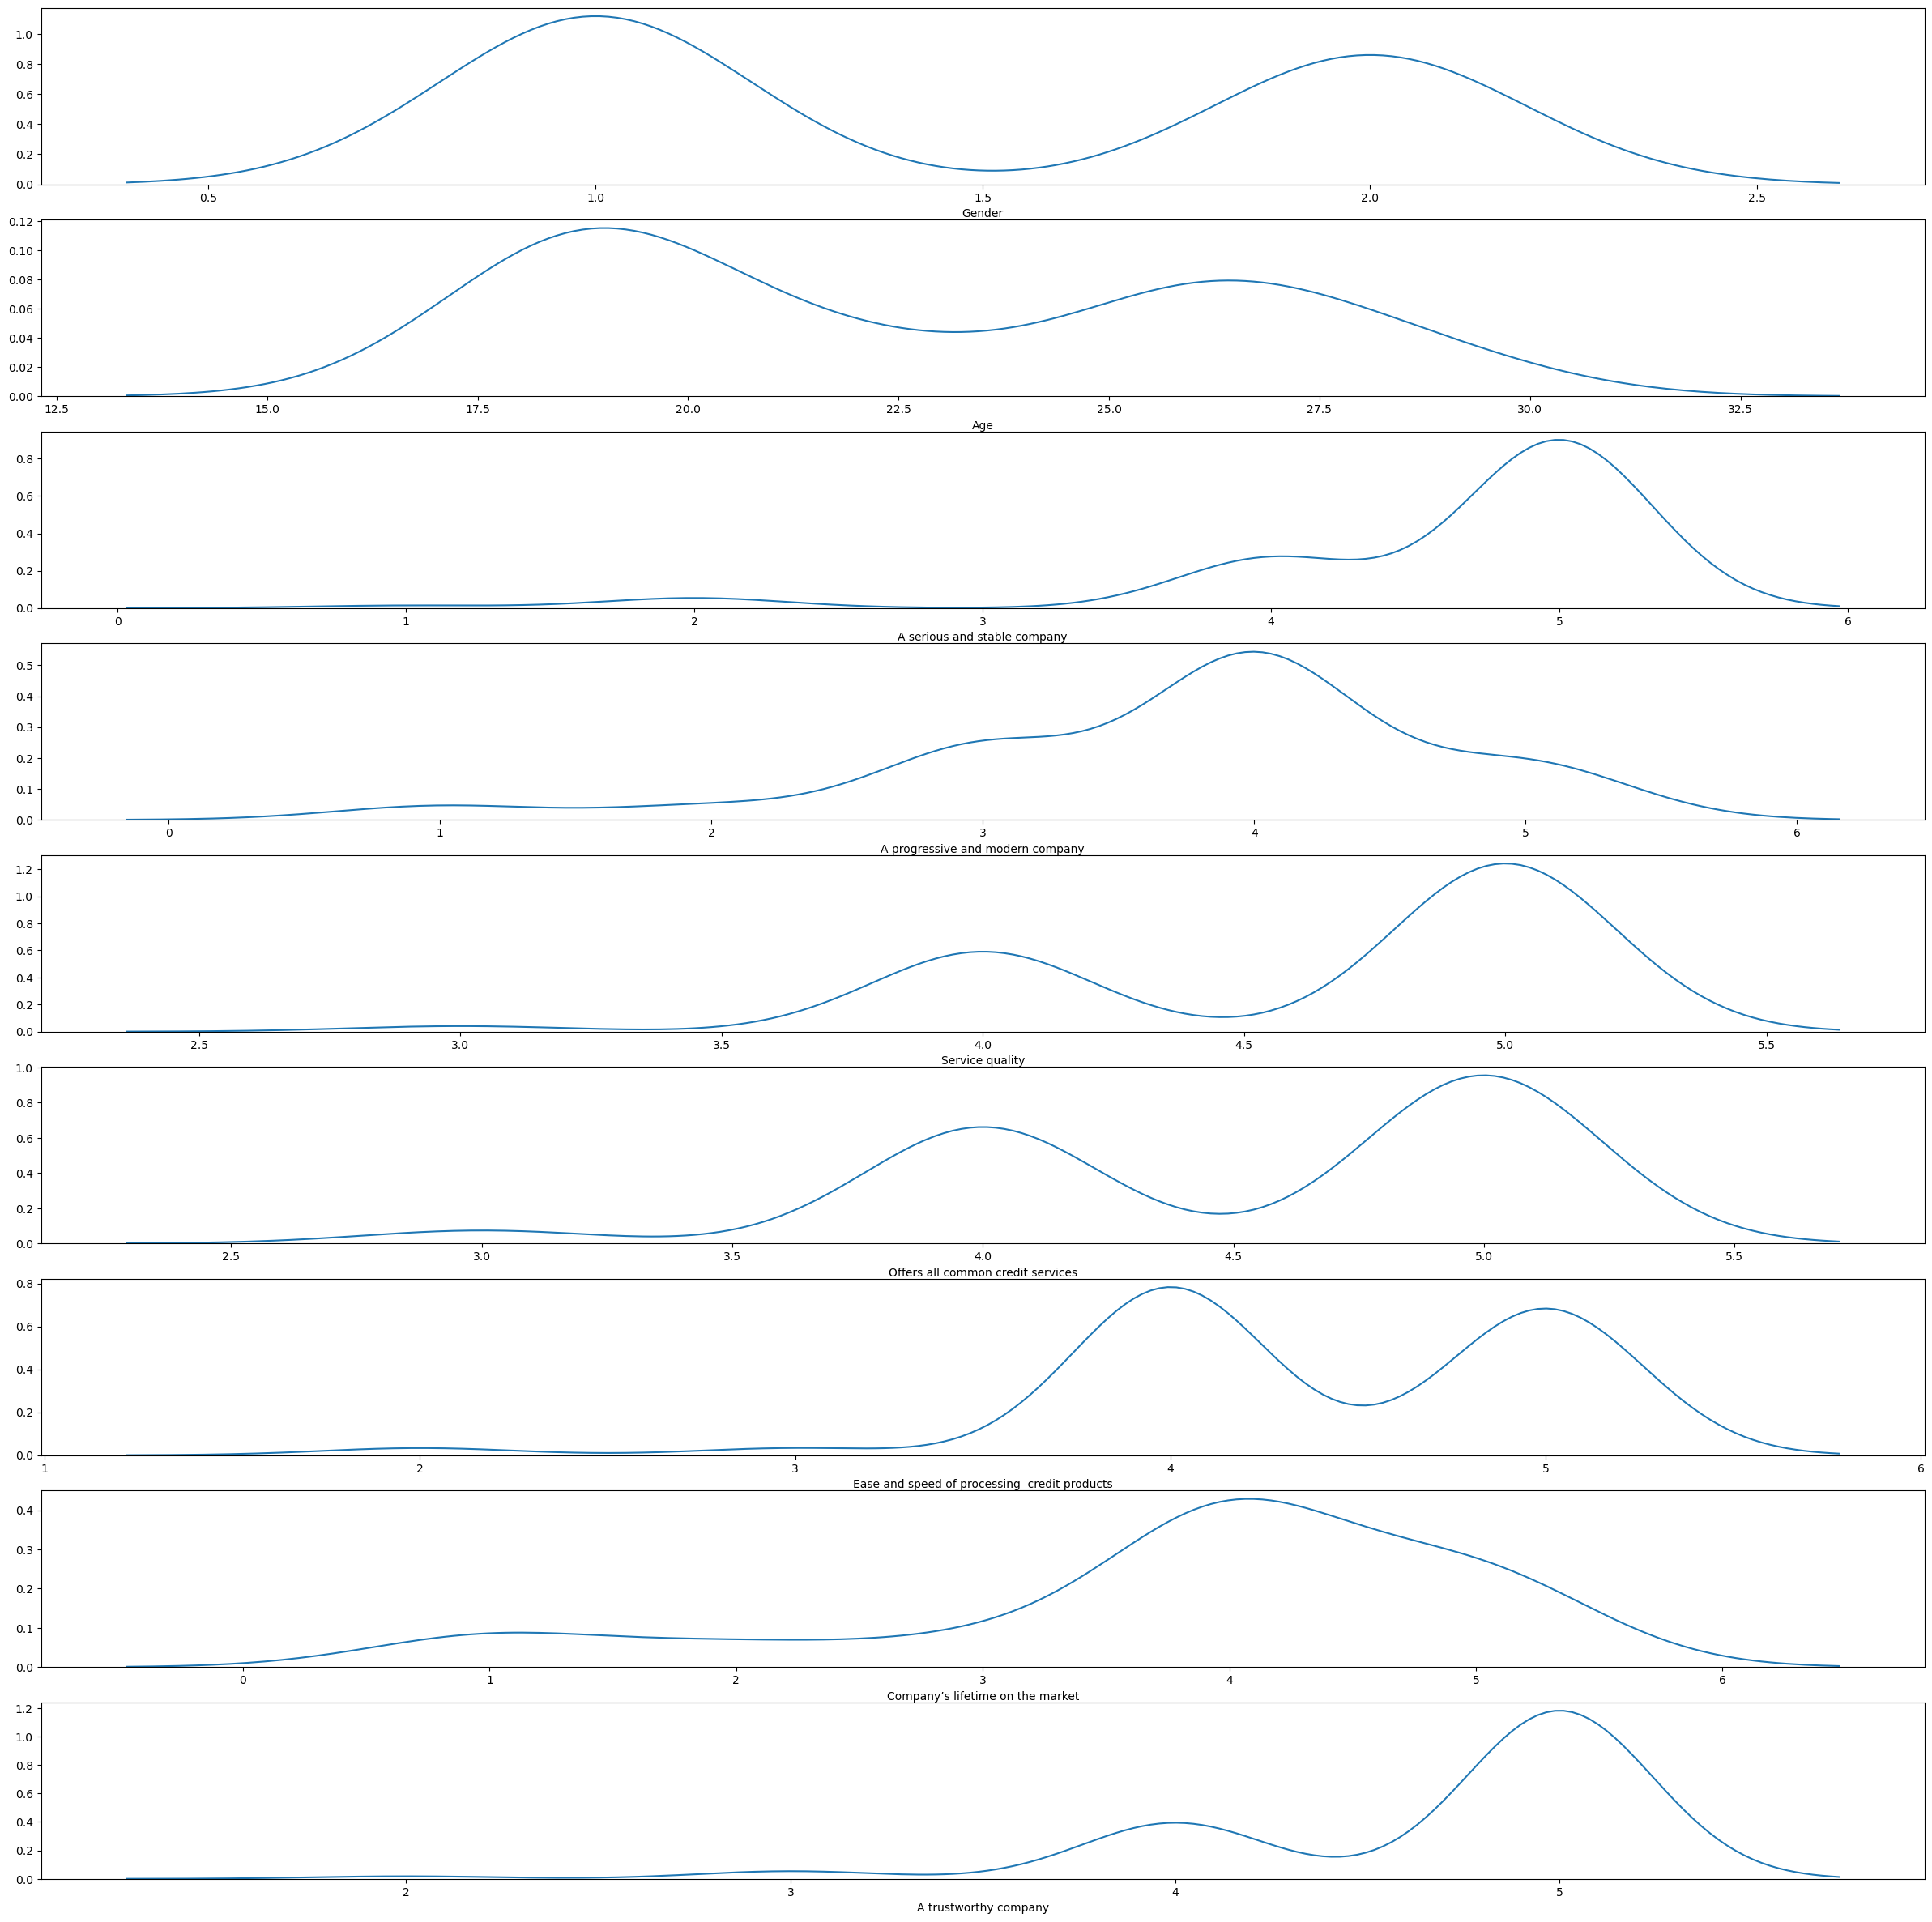

In [162]:
fig,axs=plt.subplots(len(df.columns[1:]),figsize=(30,30))
for k,i in enumerate(young.columns[1:]):
    yy=young.drop(columns='Main bank')
    sns.kdeplot(yy[i],ax=axs[k])
    axs[k].set_ylabel(None)


<font size= '5'> Выводы:  </font>

<font size='5'> 1) 1 Гендер преобладает над 2 </font>

    

<font size='5'>2) Все остальные признаки распределены неравномерно: преобладают большие значения </font>

<font size= '5'> Теперь построим распределения по признакам по каждому банку</font>

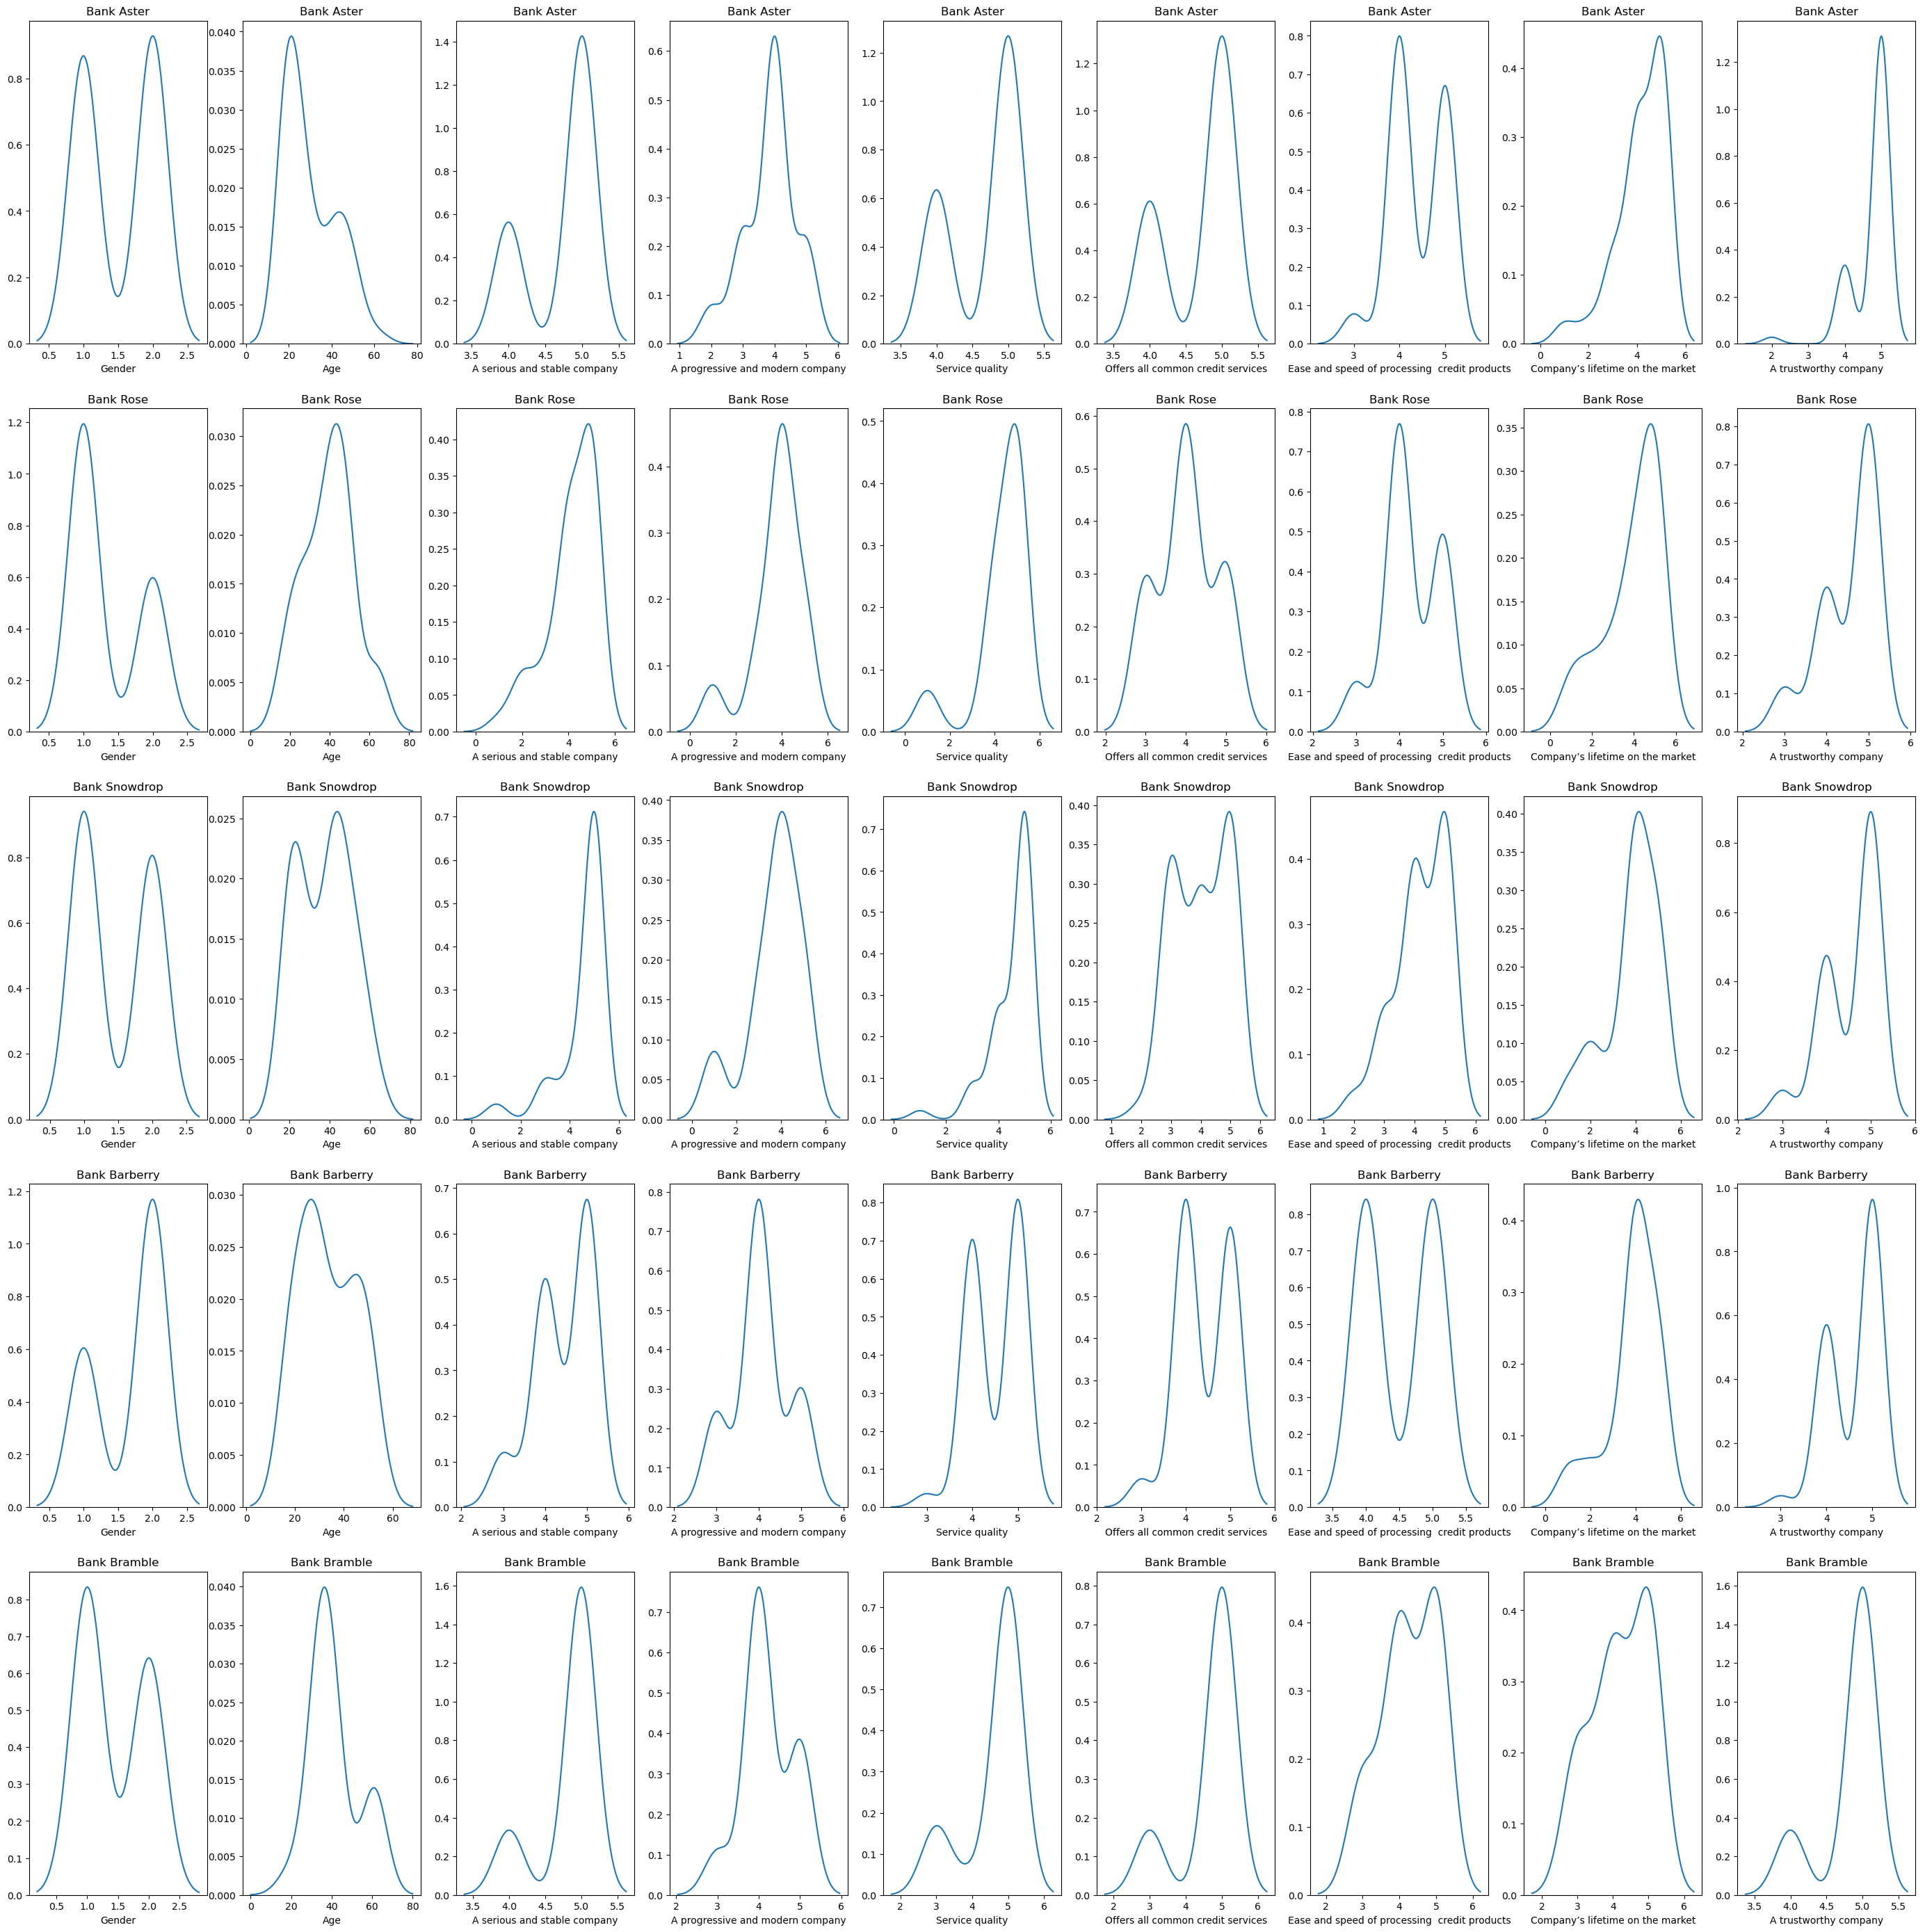

In [163]:
banks=df['Main bank'].unique()

fig,axs=plt.subplots(5,9,figsize=(35,35))



for k,i in enumerate(banks):
    xx=df[df['Main bank']==i]
    for g,j in enumerate(df.columns[1:]):
        sns.kdeplot(xx[j],ax=axs[k][g])
        axs[k][g].set_title(i)
        axs[k][g].set_ylabel(None)

<font size= '5'> Теперь посмотрим, в каких банках доля молодых пользователей - самая высокая </font>

In [164]:
data=[]
labels=[]
yung=[]
all_=[]
for i in young['Main bank'].unique():
    labels.append(i[4:])
    print(i)
    yung.append(young.groupby('Main bank').get_group(i).shape[0])
    print(young.groupby('Main bank').get_group(i).shape[0]/df.groupby('Main bank').get_group(i).shape[0])
    data.append(young.groupby('Main bank').get_group(i).shape[0]/df.groupby('Main bank').get_group(i).shape[0])
    print(young.groupby('Main bank').get_group(i).shape[0],df.groupby('Main bank').get_group(i).shape[0])
    all_.append(df.groupby('Main bank').get_group(i).shape[0])
    print('кол-во молодых, кол-во всего')
    print('---')

Bank Rose
0.26666666666666666
12 45
кол-во молодых, кол-во всего
---
Bank Barberry
0.5
22 44
кол-во молодых, кол-во всего
---
Bank Aster
0.6333333333333333
38 60
кол-во молодых, кол-во всего
---
Bank Snowdrop
0.36538461538461536
19 52
кол-во молодых, кол-во всего
---
Bank Bramble
0.043478260869565216
1 23
кол-во молодых, кол-во всего
---


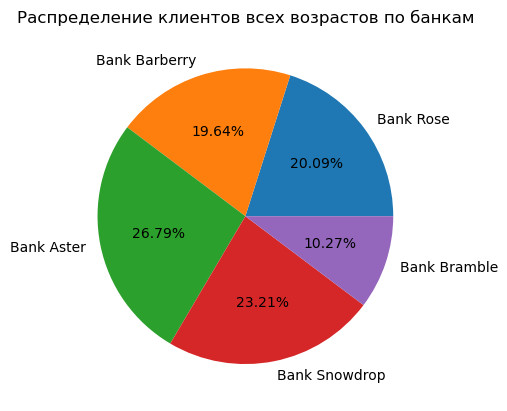

In [165]:
plt.pie(all_,labels=young['Main bank'].unique(),autopct= '%1.2f%%')
plt.title('Распределение клиентов всех возрастов по банкам')
plt.show()

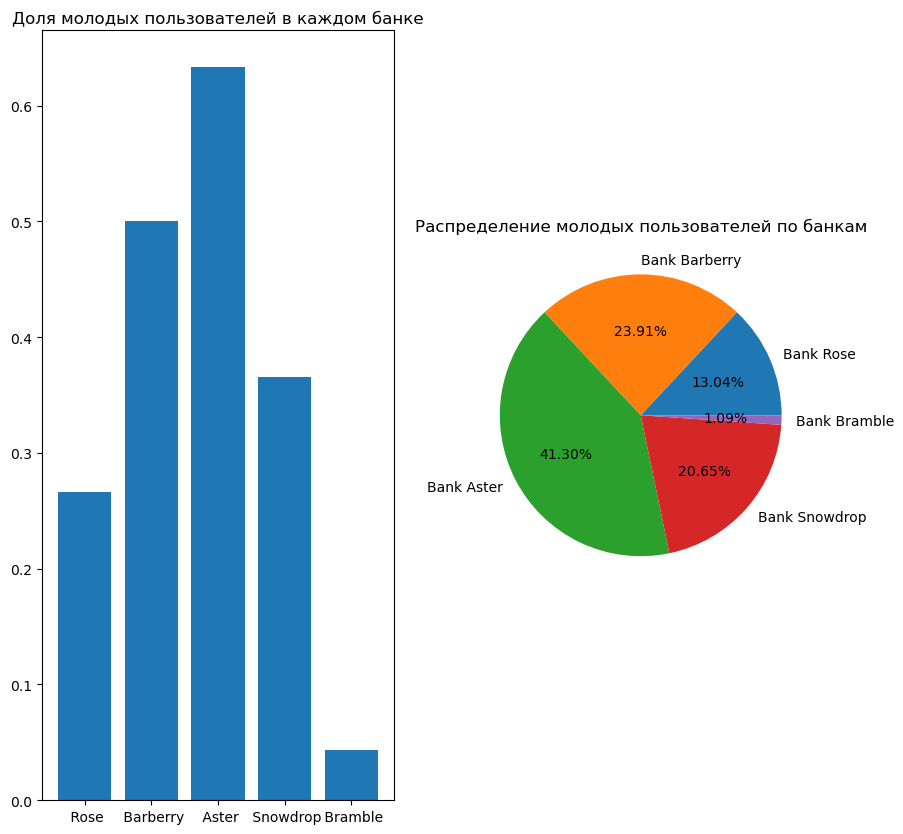

In [166]:
fig,axs=plt.subplots(ncols=2,figsize=(10,10))


axs[0].bar(labels,data)
axs[1].pie(yung,labels=young['Main bank'].unique(),autopct= '%1.2f%%')
axs[0].set_title('Доля молодых пользователей в каждом банке')
axs[1].set_title('Распределение молодых пользователей по банкам')
plt.show()

<font size= '5'>Получим, что наш банк и Bank Barbery - пользуются наибольшей популярностью среди молодежи. Кроме того, наш банк - лидер на данном рынке</font>

<font size= '5'>Теперь посмотрим, что в среднем группы young и old  находят важным</font>

In [167]:
young[important].mean()
   

/var/folders/1q/2kvm77_10lqb1xjxbx31cfyr0000gn/T/ipykernel_45165/4061182179.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  young[important].mean()


A progressive and modern company    3.728261
Service quality                     4.641304
Company’s lifetime on the market    3.782609
A trustworthy company               4.663043
dtype: float64

In [168]:
for i in old[important]['Main bank'].unique():
    print(i)
    print('------')
    print('old')
    print(old[important].groupby('Main bank').get_group(i).agg('mean'))
    print('---')
    print('young')
    print(young[important].groupby('Main bank').get_group(i).agg('mean'))
    print('------')

Bank Aster
------
old
A progressive and modern company    4.000000
Service quality                     4.681818
Company’s lifetime on the market    4.727273
A trustworthy company               4.863636
dtype: float64
---
young
A progressive and modern company    3.763158
Service quality                     4.657895
Company’s lifetime on the market    3.842105
A trustworthy company               4.684211
dtype: float64
------
Bank Rose
------
old
A progressive and modern company    3.818182
Service quality                     4.212121
Company’s lifetime on the market    4.484848
A trustworthy company               4.515152
dtype: float64
---
young
A progressive and modern company    3.750000
Service quality                     4.666667
Company’s lifetime on the market    2.333333
A trustworthy company               4.583333
dtype: float64
------
Bank Snowdrop
------
old
A progressive and modern company    4.030303
Service quality                     4.393939
Company’s lifetime on the ma

/var/folders/1q/2kvm77_10lqb1xjxbx31cfyr0000gn/T/ipykernel_45165/3814715768.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(old[important].groupby('Main bank').get_group(i).agg('mean'))
/var/folders/1q/2kvm77_10lqb1xjxbx31cfyr0000gn/T/ipykernel_45165/3814715768.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(young[important].groupby('Main bank').get_group(i).agg('mean'))
/var/folders/1q/2kvm77_10lqb1xjxbx31cfyr0000gn/T/ipykernel_45165/3814715768.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns 

/var/folders/1q/2kvm77_10lqb1xjxbx31cfyr0000gn/T/ipykernel_45165/1110713643.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sns.barplot(x=important[:-1],y=young[important].mean().values,orient='v')


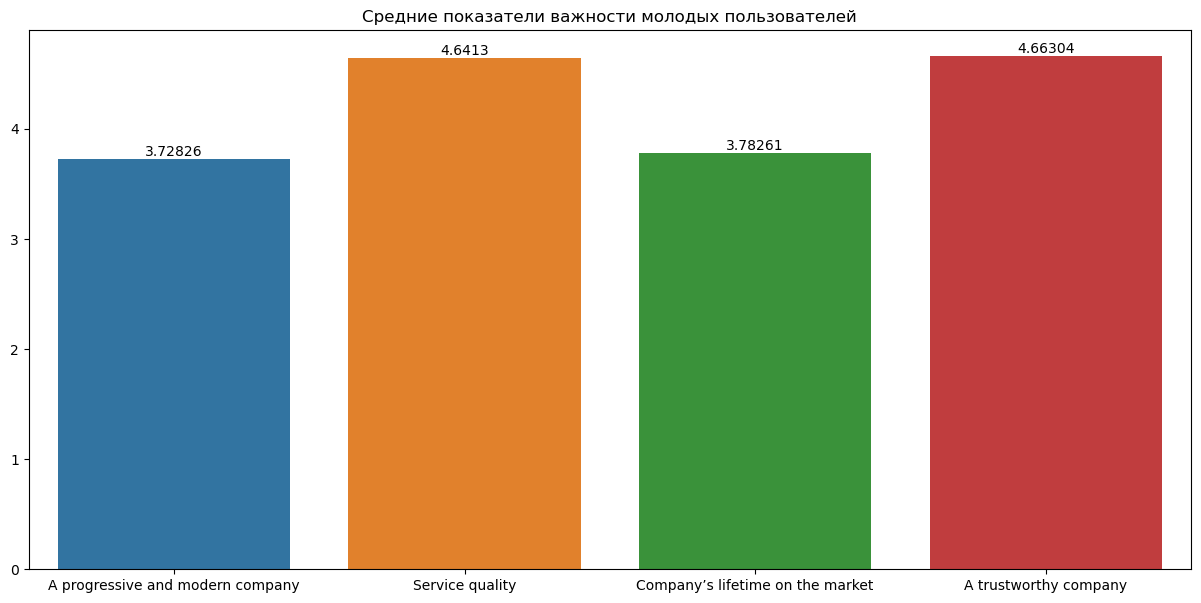

In [169]:
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)
sns.barplot(x=important[:-1],y=young[important].mean().values,orient='v')
ax.set_title('Cредние показатели важности молодых пользователей')
ax.bar_label(ax.containers[0])
plt.show()

In [170]:
old[important].mean()
   

/var/folders/1q/2kvm77_10lqb1xjxbx31cfyr0000gn/T/ipykernel_45165/647228157.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  old[important].mean()


A progressive and modern company    3.992424
Service quality                     4.454545
Company’s lifetime on the market    4.136364
A trustworthy company               4.621212
dtype: float64

<font size= '5'>Видно, что обе группы важнее всего для себя выделяют "Service quality" и "A trustworthy company". Следовательно нашему банку следует сконцетрироваться на улучшении вышеуказанных признаков</font>





<font size= '5'>Важная ремарка: нашему банку будет непросто повышать долю молодых пользователей, так как потребители постарше обладают схожими предпочтениями, однако вряд ли это можно считать проблемой, ведь любой пользователь приносит банку деньги</font>


<font size='5'> Далее посмотрим, на среднюю удовлетворенность пользователей услугами банка, клиентами которого они являются </font>

In [171]:
young_group=young[satisfication].groupby('Main bank').agg('mean')
young_group

,A serious and stable company,Offers all common credit services,Ease and speed of processing credit products
Main bank,,,
Bank Aster,4.684211,4.578947,4.473684
Bank Barberry,4.772727,4.363636,4.500000
Bank Bramble,5.000000,5.000000,5.000000
Bank Rose,3.666667,4.416667,4.416667
Bank Snowdrop,4.842105,4.631579,4.000000


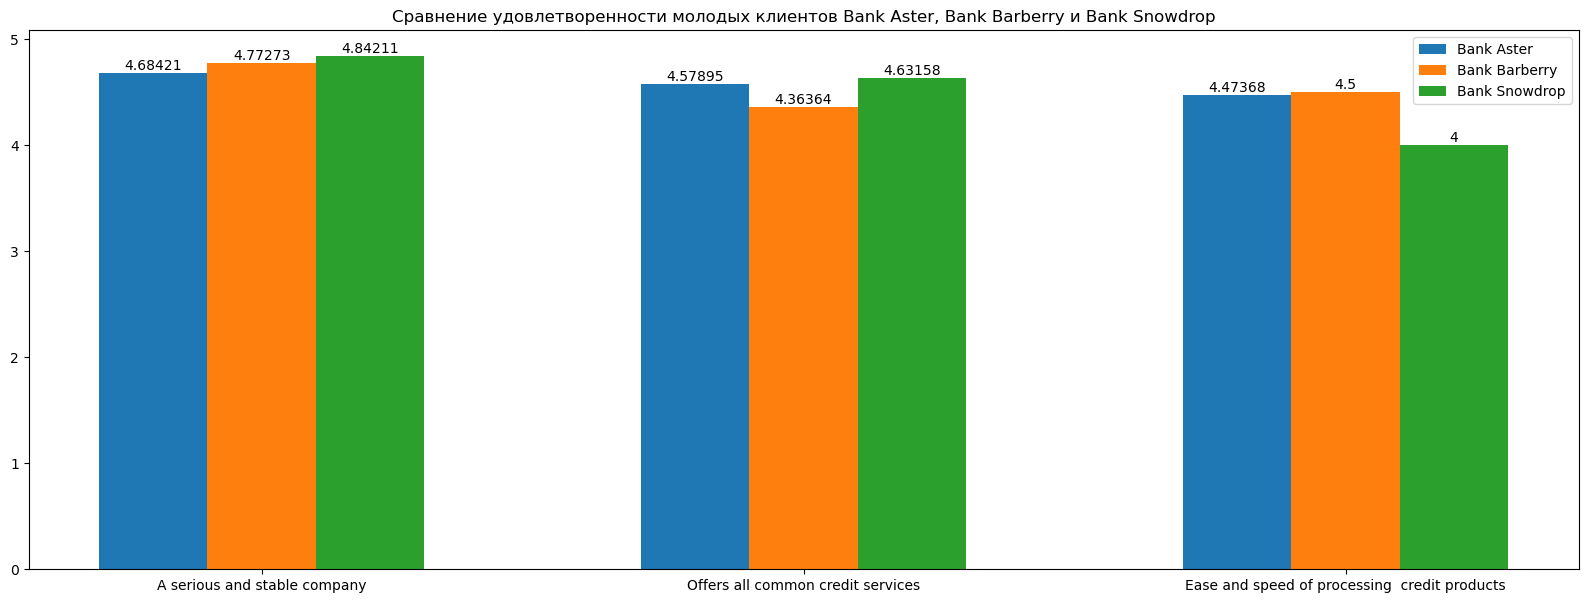

In [172]:
x=np.arange(len(satisfication[:-1]))
fig = plt.figure(figsize=(20, 7))
ax = fig.add_subplot(111)
plt.bar(x-0.2,[4.684211, 4.578947,4.473684],label='Bank Aster',width=0.2)
plt.bar(x,[4.772727,4.363636,4.500000],label='Bank Barberry',width=0.2)
plt.bar(x+0.2,[4.842105,4.631579,4.000000],label='Bank Snowdrop',width=0.2)
plt.legend()
for container in ax.containers:
    ax.bar_label(container)
ax.set_title('Cравнение удовлетворенности молодых клиентов Bank Aster, Bank Barberry и Bank Snowdrop')
plt.xticks(x,satisfication[:-1])
plt.show()

<font size='5'>
Из вышеизложенного можно сделать несколько выводов:
</font >


<font size='5'> 1) нашему банку необходимо работать на улучшением всех показателей из группы satisfication, так как наши ближайшие конкуренты обгоняют нас по ним </font>

<font size='5'> 2) необходимо попробовать переманить недовольных респондентов к нам</font >


<font size='5'>Важная ремарка: несмотря на то, что у Bank Bramble - самые высокие показатели, его нельзя рассматривать в анализе, так как у данного банка лишь 1 клиент молодого возраста</font>

<font size='5'> Займемся первым пунктом: </font>

<font size= '5'> для этого построим корелляционную матрицу для молодых пользователей. </font>

In [173]:
young1=young.drop(columns='Main bank').astype(int)

<AxesSubplot:>

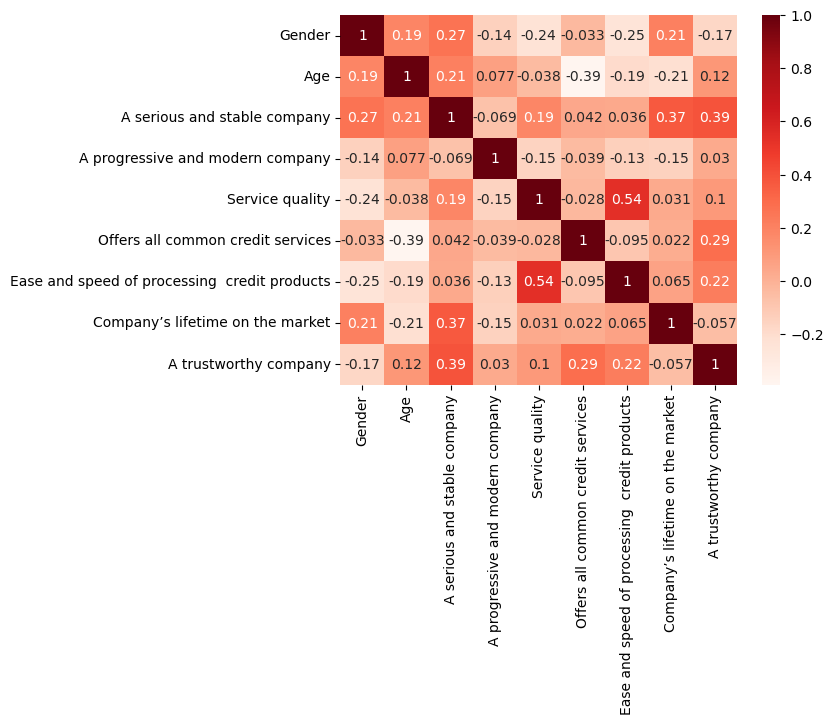

In [174]:
sns.heatmap(young1.corr(),annot=True,cmap='Reds')

<font size= '5'> Заметим, что почти все признаки очень слабо друг с дургом кореллируют, так как коэффициент корреляции почти везде по модули ниже 0.5. Однако нужный нам "Ease and speed of processing credit products" как раз кореллирует с 'Service quality' </font>

<font size= '5'>Из этого можно сделать вывод, что руководству следует сконцетрироваться на улучшении 'Service quality',так как данный показатель высоко ценится молодыми пользователями и, более того, его улучшение приведет к улучшению 'Ease and speed of processing credit products', что позволит нам обоганть конкурентов </font>

<font size='5'>Теперь займемся вторым пунктом. Для начала давайте посмотрим на недовольных пользователей:</font>

In [175]:
sad=young[(young['A serious and stable company']<=3) | (young['Offers all common credit services']<=3)  | (young['Ease and speed of processing  credit products']<=3)][satisfication]
sad

,A serious and stable company,Offers all common credit services,Ease and speed of processing credit products,Main bank
15,4,3,4,Bank Snowdrop
39,5,3,5,Bank Barberry
70,1,4,5,Bank Rose
89,2,5,4,Bank Rose
91,5,5,3,Bank Snowdrop
99,5,5,2,Bank Snowdrop
126,2,5,4,Bank Rose
146,4,3,4,Bank Snowdrop
164,2,5,4,Bank Rose
166,5,5,3,Bank Snowdrop


<font size='5'>Посмотрим, что в среднем не нравится клиентам наших конкурентов </font>

In [176]:
sad.groupby('Main bank').mean()

,A serious and stable company,Offers all common credit services,Ease and speed of processing credit products
Main bank,,,
Bank Barberry,5.000000,3.000000,5.000000
Bank Rose,1.800000,4.800000,4.200000
Bank Snowdrop,4.571429,4.142857,3.142857


<font size = '5'>
Из представленного выше можно сделать несколько выводов: 
 </font>

<font size = '5'>
1) клиентам банка Barberry нужно разослать рекламу нашего банка, где упор идет на 'Offers all common credit services'
</font>

<font size = '5'>
2) клиентам банка Rose нужно разослать рекламу нашего банка, где упор идет на 'A serious and stable company'
</font>

<font size = '5'>
3) клиентам банка Snowdrop нужно разослать рекламу нашего банка, где упор идет на 'Ease and speed of processing credit products' </font>